# Integrais de liña en 2 e 3 dimensións

O cálculo de integrais de liña son unha nova extensión das integrais usuais nunha única variable onde o dominio de integración era un segmento sobre o eixo de coordenadas. Agora, o dominio de integración será unha porción dunha liña (curva) nun plano bidimensional ou no espazo tridimendional. Para realizar estes cálculos, seguiremos usando o módulo **Sympy**. Ademais, destes cálculos integrais, tamén revisaremos como introducir a parametrización dunha curva, estudo que xa foi realizado na *práctica 4*.

Nesta práctica volveremos a usar o módulo **Sympy** tanto para calcular integrais como para representar as curvas que serán usadas como dominio de integración.


## Obxectivos

- Revisión da parametrización de liñas en 2D e 3D (**repaso**)
- Cálculo de integrais de liña


# Parametrización de liñas en 2D e 3D

Como xa fixemos en prácticas anteriores, para usar os módulos **Numpy**, **Matplotlib** e **Sympy**, o primeiro que debemos facer é importalos, e posto que usaremos este módulo usando a interface `pyplot` de **Matplotlib**, tamén haberá que importar esta. 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sympy as sp
%matplotlib inline

## Representación de curvas no plano (repaso)
Unha curva no plano pódese definir como un conxunto de puntos que satisface a relación:
$$
\text{Curva}=\{(x,y)\in\mathbb{R}^2:\ x=f(t),\ y=g(t)\text{ con }t\in\mathbb{R}\}=\{(f(t),g(t)):t\in\mathbb{R}\},
$$
onde $t$ é o que se denomina parámetro da representación da curva. 

Por exemplo, para representar a curva
$$
x=\sin(t),\ y=\cos(3t),\ t\in[0,2\pi]
$$
empregaríase o comando `plot_parametric`:

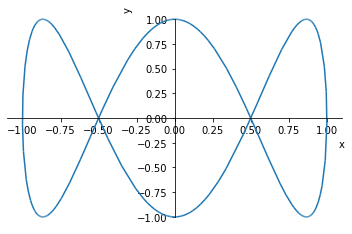

In [9]:
t = sp.symbols('t', real=True)
p = sp.plotting.plot_parametric(sp.sin(t), sp.cos(3*t), (t, 0, 2*sp.pi), show=False)
p.xlabel='x'
p.ylabel='y'
p.show()

## Representación de curvas no espazo tridimensional (repaso)
De forma análoga no espazo tridimensional, unha curva ven definida por tres funcións diferentes:
$$
\text{Curva}=\{(x,y,z)\in\mathbb{R}^3:\ x=f(t),\ y=g(t),\ z=h(t)\text{ con }t\in\mathbb{R}\}=\{(f(t),g(t),h(t)):\ t\in\mathbb{R}\},
$$
onde $t$ é o que se denomina parámetro da representación da curva.

Por exemplo, para representar graficamente a curva definida
$$
\begin{align*}
f(t)&=\cos(t),\\
g(t)&=\sin(t),\\
h(t)&=2t,
\end{align*}
$$
con $t\in[0,8\pi]$, usaremos a función `plot3d_parametric_line` como segue:

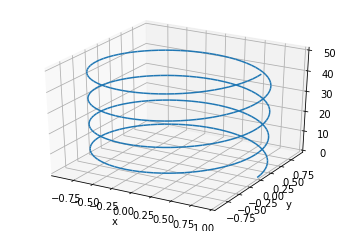

In [10]:
t = sp.symbols('t', real=True)
xt = sp.cos(t)
yt = sp.sin(t)
zt = 2*t
p = sp.plotting.plot3d_parametric_line(xt, yt, zt, (t, 0, 8*sp.pi), show=False)
p.xlabel='x'
p.ylabel='y'
p.zlabel='z'
p.show()

### Exercicio 11.1
Calcula os vectores velocidade e aceleración sobre algúns puntos da espiral anterior. Representa graficamente estes vectores (velocidade en vermello e aceleración en azul usando **Matplotlib**). Que relación hai entre os dous campos de vectores?

In [8]:
## O TEU CÓDIGO AQUÍ

# Cálculo de integrais de liña en 2D e 3D

O cálculo dunha integral de liña non deixa de ser unha integral calculada sobre unha única variable, neste caso sobre o parametro da parametrización usada para representar a liña (curva) sobre a que se integra. Máis precisamente, se a porción de curva ven dada por 
$$
C=\{(x,y,z)\in\mathbb{R}^3:\ x=f(t),\ y=g(t),\ z=h(t)\text{ con }t\in[t_{0},t_{1}]\}
$$
onde $t$ é o que se denomina parámetro da representación da curva, entón
$$
\int_{C}F(x,y,z)d\ell=\int_{t_{0}}^{t_{1}}F(f(t),g(t),h(t))\sqrt{(f'(t))^2+(g'(t))^2+(h'(t))^2}dt.
$$
Unha expresión análoga sería válida para integrais de liña en dúas dimensións (onde se podería supoñer que $z=0$).

Vexamos cun exemplo como realizaríamos o cálculo da integral de liña no caso de 
$$
\int_{C}2xy\,d\ell,
$$
onde $C=\{(x,y,z)\in\mathbb{R}^3: x=t,\ y=t^2,\ z=3t-2,\ t\in[0,1]\}$.

In [27]:
x, y, z, t = sp.symbols('x y z t', real=True)
F = sp.Lambda((x,y,z), 2*x*y)
# Parametrización da curva
C = sp.Lambda(t,sp.Matrix((t,t**2,3*t-2)))
# Cálculo do vector velocidade
v = sp.diff(C(t),t)
display('Módulo de v:',v.norm())
# Calculo da integral de liña
I = sp.integrate(F(*C(t))*v.norm(),(t,0,1))
display('Integral de liña:', I)

'Módulo de v:'

sqrt(4*t**2 + 10)

'Integral de liña:'

-14*sqrt(14)/15 + 5*sqrt(10)/3

### Exercicio 11.2
Calcula a integral de liña
$$
\int_{C}(x^2-y+3z)d\ell,
$$
onde $C$ é o segmento recto de extremos $(0,0,0)$ e $(1,2,1)$.

In [30]:
x, y, z, t = sp.symbols('x y z t', real=True)
F = sp.Lambda((x,y,z), x**2-y+3*z)
# Parametrización da curva
C = sp.Lambda(t,sp.Matrix((0+t*1,0+t*2,0+t*1)))
# Cálculo do vector velocidade
v = sp.diff(C(t),t)
display('Módulo de v:',v.norm())
# Calculo da integral de liña
I = sp.integrate(F(*C(t))*v.norm(),(t,0,1))
display('Integral de liña:', I)